# Logistic Regression

*Logistic Regression using least square loss with $L_2$ regularization penalty*

---
* [Theory and Derivation](../theory/logistic_regression.ipynb)
* [Implementation in Python](../pymlalgo/regression/logistic_regression.py)

---

In [42]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
import os 
import sys

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path:
    sys.path.append(module_path)

**Using the [digits dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) with two classes to demo the implementation of Logistic regression**

In [45]:
from sklearn.datasets import load_digits

In [46]:
digits = load_digits(n_class = 2)
predictors = digits.data
response = digits.target
x = np.asarray(predictors)
y = np.asarray(response).reshape(-1, 1)
y = np.where(y==0,-1,1)

**Train, test split**

In [47]:
from pymlalgo.util.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((294, 64), (72, 64), (294, 1), (72, 1))

**Normalizing the Data as** $\frac{x-\mu}{\sigma}$ 

In [48]:
from pymlalgo.util.standardization import Standardizer
x_standardizer = Standardizer(x_train)
x_train = x_standardizer.standardize(x_train)
x_test = x_standardizer.standardize(x_test)

**Training the model using `LogisticRegression`**

In [49]:
from pymlalgo.regression.l2_regularised_logistic import LogisticRegression
lamb= 1
logistic_model = LogisticRegression(x_train, y_train, lamd=lamb, eps=1e-4, max_iterations=1500)
logistic_model.train()

**Cost history vs number of iterations**

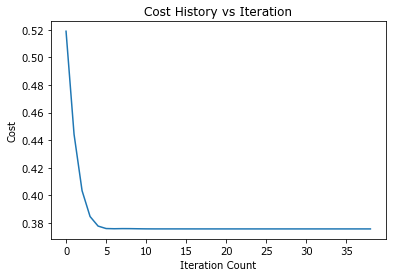

In [50]:
plt.plot(logistic_model.cost_history_fastgrad[1:])
plt.xlabel('Iteration Count')
plt.ylabel('Cost')
plt.title('Cost History vs Iteration');

**Misclassification error reported on train and test data**

In [51]:
pd.DataFrame({'train_score' : [logistic_model.mis_classification_error(x_train, y_train)], 
              'test_score': [logistic_model.mis_classification_error(x_test, y_test)]})

,train_score,test_score
0,0.340136,0.0


**Comparison with `sklearn`**  

The cost function in `sklearn` is $$ F(\beta) = \frac{||Y - X^T\beta||_2^2 + C ||\beta||_2^2}{2m}$$
To make it equivalent to the cost function in current implementation, $$\lambda = \frac{1}{C*m*2}$$, where m is number of training samples 

In [52]:
from sklearn.linear_model import LogisticRegression

alpha = 1/(2*len(x_train)*lamb)
logistic_sk = LogisticRegression(C = alpha, random_state = 42,fit_intercept=False)
logistic_sk.fit(x_train, y_train.ravel())

pd.DataFrame({'coef': logistic_model.beta.flatten(), 'sk_coef' : logistic_sk.coef_.flatten()})

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.0017006802721088435, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=42,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

,coef,sk_coef
0,0.000000,0.000000
1,-0.000641,-0.000640
2,-0.015974,-0.015963
3,-0.044998,-0.044998
4,-0.015942,-0.015942
5,0.042122,0.042133
6,0.039379,0.039388
7,0.000000,0.000000
8,0.000000,0.000000
9,-0.025778,-0.025775


In [53]:
pd.DataFrame({'train_score' : [1-logistic_model.mis_classification_error(x_train, y_train)], 
              'train_score_sk' : [logistic_sk.score(x_train, y_train)],
              'test_score': [1-logistic_model.mis_classification_error(x_test, y_test)],
              'test_score_sk' : [logistic_sk.score(x_test, y_test)]})

,train_score,train_score_sk,test_score,test_score_sk
0,0.659864,0.996599,1.0,1.0
